# History data loading notebook

In [33]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy as np
import Utilities as ut

In [39]:
# loading the history file (here history.pkl)
f = open("../runs/run2.pkl", "rb")
data = pickle.load(f)

In [40]:
print(data[0].keys())

dict_keys(['visPos', 'fltPos', 'path', 'map', 'goal', 'pathComputed', 'vtime', 'started', 'running', 'time', 'state', 'ML', 'MR', 'alpha', 'beta', 'rho'])


In [41]:
def loadKeySeq(data, key):
    retList = []
    for item in data:
        retList.append(item[key])
        
    return retList

[[(86.8, 39.0), (76.0, 47.2), (73.4, 61.0), (81.4, 72.2), (99.8, 73.4), (99.8, 40.6)], [(69.0, 21.2), (62.4, 14.8), (49.0, 13.0), (37.6, 21.6), (27.6, 42.2), (19.2, 33.4), (0.8, 38.6), (0.0, 66.4), (18.8, 64.4), (27.0, 72.4), (41.0, 69.8), (49.8, 81.6), (60.6, 81.6), (69.2, 72.4), (61.6, 47.4), (71.6, 35.0)]]


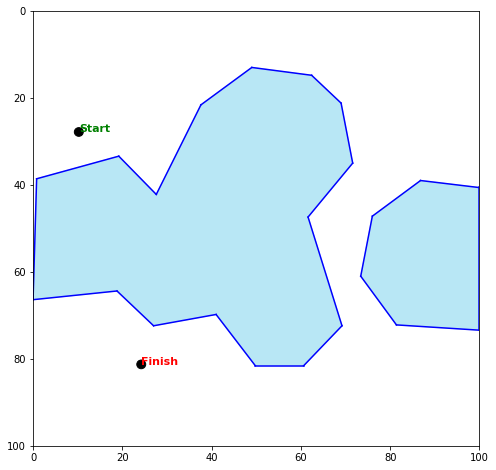

In [42]:

start = (float(data[0]['visPos'][0]),float(data[0]['visPos'][1]))
finish = (float(data[-1]['goal'][0]),float(data[-1]['goal'][1]))



map = data[-1]['map']
polyMap= []
for poly in map:
    nPoly = []
    for p in poly:
        nPoly.append( (float(p[0][0]),float(p[0][1])))
    polyMap.append(nPoly)


print(polyMap)

u = ut.Utilities()

u.mapPlot(map = polyMap,start = start, finish = finish)

## Plot example

In [43]:
visTimes = loadKeySeq(data,'vtime')
time = loadKeySeq(data,'time')

In [44]:
visTimes = [float(el) for el in visTimes]
time = [float(el) for el in time]

In [45]:
def parseNone(rawValues):
    ret = []
    for el in rawValues:
        if el is None:
            ret.append(0.0)
        elif isinstance(el,np.ndarray):
            ret.append(el[0])
        else:
            ret.append(el)
    return ret

In [46]:
time = loadKeySeq(data,'time')
visTimes = loadKeySeq(data,'vtime')
ML = loadKeySeq(data,'ML')
MR = loadKeySeq(data,'MR')

rawRho = loadKeySeq(data,'rho')
rho = parseNone(rawRho)

rawAlpha = loadKeySeq(data,'alpha')
alpha = parseNone(rawAlpha)

rawBeta = loadKeySeq(data,'beta')
beta = parseNone(rawBeta)


#ML = ML[30:90]
#time = time[30:90]

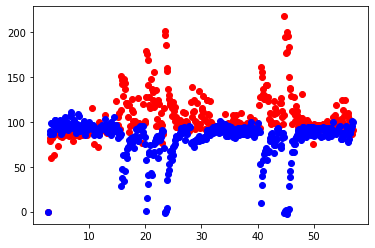

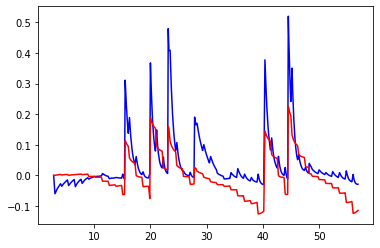

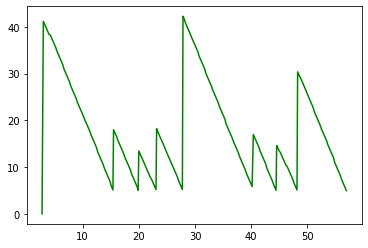

In [47]:
plt.plot(time,ML, 'bo', color = 'red') 
plt.plot(time,MR, 'bo', color = 'blue')
plt.show()

plt.plot(time,alpha, color = 'blue')
plt.plot(time,beta, color = 'red')
plt.show()

plt.plot(time,rho, color = 'green')
plt.show()

In [14]:
def mapPlot(map=False,start=False,finish=False,visPos=False, kalPos = False):
        #plotting parameters
        fsz = 8 # size of the plotted figure
        polyColor = "blue" # color of the map polygons
        polyFillColor = "#b8e7f5" # color of interior of the map polygons
        startColor = "green" # color of the starting point
        finishColor = "red" # color the the finish point
        debugLineColor = "red"
        emphasedLineColor = "green"

        #defining a function to plot a polygon :
        #setting map limits
        plt.xlim(0,100)
        plt.ylim(0,100)

        fig = plt.gcf()
        ax = fig.gca()

        ## we need origin to right so we flip the plot
        ax.invert_yaxis()
        fig.set_size_inches((fsz,fsz))
        

        ## plotting polygons
        if map !=False:
            polyMap = []
            for poly in map:
                nPoly = []
                for p in poly:
                    nPoly.append( (float(p[0][0]),float(p[0][1])))
                polyMap.append(nPoly)
                
            for poly in polyMap:
                for i in range(len(poly)-1):
                    plt.plot([ poly[i][0],poly[i+1][0] ],[ poly[i][1],poly[i+1][1] ],color=polyColor)
                plt.plot([ poly[len(poly)-1][0],poly[0][0] ],[ poly[len(poly)-1][1],poly[0][1] ],color=polyColor)
                x = []
                y = []
                for vertex in poly:
                    x.append(vertex[0])
                    y.append(vertex[1])
                plt.Polygon(poly,color=polyColor)
                ax.fill(x,y,color = polyFillColor)  
        
        #Displaying start and finish
        if start != False:
            startCircle = plt.Circle(start,radius=1,color="black")
            ax.add_artist(startCircle)
            ax.text(*start,"Start",fontsize=11,color=startColor,weight="bold")
        if finish != False:
            finishCircle = plt.Circle(finish,radius=1,color="black")
            ax.add_artist(finishCircle)
            ax.text(*finish,"Finish",fontsize=11,color=finishColor,weight="bold")
            
        if visPos != False:
            for i in range(1,len(visPos)):
                plt.plot([ visPos[i-1][0],visPos[i][0] ],[ visPos[i-1][1],visPos[i][1] ],color="red",linestyle="dashed",linewidth=2)
                        
        if kalPos != False:
            for i in range(1,len(kalPos)):
                plt.plot([ kalPos[i-1][0],kalPos[i][0] ],[ kalPos[i-1][1],kalPos[i][1] ],color="blue",linestyle="dashed",linewidth=2)
                        
        #displaying the map
        plt.show()

# Plot trajectories of a given run : 

In [31]:
def plotTrajectories(data):
    visPos = loadKeySeq(data,'visPos')

    kalPos = loadKeySeq(data,'fltPos')

    start = (data[0]['visPos'][0],data[0]['visPos'][1])
    goal = data[-1]['path'][-1]

    mp = data[-1]['map']
    mapPlot(map = mp,start=start, finish = goal, visPos=visPos,kalPos = kalPos)


<ipython-input-14-4cadf7bda141>:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if map !=False:


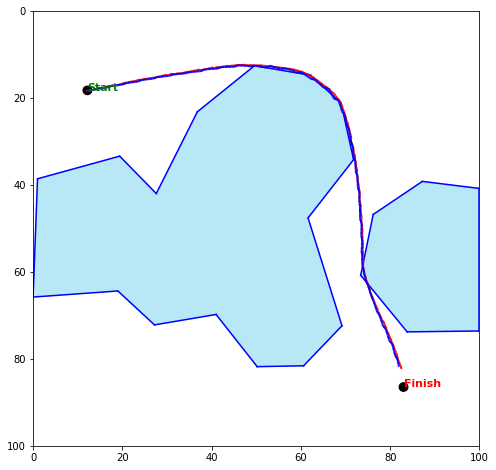

In [32]:
plotTrajectories(data)